In [1]:
import pandas as pd #for data frame
import numpy as np #maths
import matplotlib.pyplot as plt #graph
import seaborn as sns #graph
# import re
import time #time and date
# from collections import Counter
# import itertools
from statsmodels.tsa.seasonal import seasonal_decompose #decomposesion'seasonality and trend'
from statsmodels.tsa.stattools import adfuller #'test'
from statsmodels.tsa.arima_model import ARIMA #algoritham 
# from statsmodels.tsa.ar_model import AutoReg
# from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.graphics.tsaplots import plot_acf
# from sklearn.metrics import mean_squared_error
# from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
path = "C:/Users/K0158013/Downloads/"

In [27]:
df = pd.read_excel(path+"Retail sales.xlsx")

In [28]:
df1 = pd.read_excel(path+"Retail sales 2.xlsx")

In [29]:
df.shape

(1010640, 52)

In [30]:
df1.shape

(236344, 52)

In [371]:
dft = pd.concat([df,df1],axis=0)

In [654]:
dft.shape

(1232054, 54)

In [655]:
dft.describe()

,Order Id,Phone Number,SKU,MRP,Unit Selling Price,Quantity,CESS 12%,CGST 14%,CGST 2.5%,CGST 6%,...,Sales Return/Refunded Qty,Sales Return/Refunded Amount,Sales Return/Refunded Tax,Sales Returns/Total Refunds,Items Sold,Gross Sales,Net Sales(Gross Sales - Sales Return/Refunded Amount - Discounted Amount),Net Tax Collected(Total Tax - Discounted Tax - Sales Return/Refunded Tax),Net Total(Net Sales + Net Tax Collected),Created_week
count,1.232054e+06,1.609700e+04,1.232047e+06,1.232054e+06,1.232054e+06,1.232054e+06,1.232054e+06,1.232054e+06,1.232054e+06,1.232054e+06,...,1.232054e+06,1.232054e+06,1.232054e+06,1.232054e+06,1.232054e+06,1.232054e+06,1.232054e+06,1.232054e+06,1.232054e+06,1.232054e+06
mean,2.496137e+06,9.240568e+09,1.238020e+05,5.888980e+01,6.124852e+01,9.784891e-01,1.022779e-02,1.213671e-02,9.359453e-02,1.035112e-01,...,2.069454e-03,1.316793e-01,2.195034e-04,1.318988e-01,9.764197e-01,4.767122e+01,4.728257e+01,8.548670e-01,4.995278e+01,1.352181e+01
std,2.136457e+05,8.325361e+08,9.678743e+04,7.492917e+01,7.426356e+01,1.450637e+00,2.355058e-01,2.841257e-01,7.128719e-01,1.202793e+00,...,1.085991e-01,6.395770e+00,1.268885e-01,6.411581e+00,1.446087e+00,2.055952e+02,2.053940e+02,5.109796e+00,2.063055e+02,7.271402e+00
min,2.003504e+06,6.245896e+09,1.815000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.220446e-16,0.000000e+00,-3.000000e+02,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.337959e+06,9.003029e+09,1.001780e+05,9.900000e+00,2.500000e+01,4.550000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.500000e-01,1.474000e+01,1.445000e+01,0.000000e+00,1.600000e+01,7.000000e+00
50%,2.577868e+06,9.551536e+09,1.002600e+05,4.000000e+01,4.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.900000e+01,2.870000e+01,0.000000e+00,3.080000e+01,1.300000e+01
75%,2.658327e+06,9.841627e+09,1.004140e+05,7.800000e+01,7.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.600000e+01,5.584000e+01,0.000000e+00,5.800000e+01,2.000000e+01
max,3.233248e+06,9.999235e+09,9.619001e+07,3.999000e+03,4.080000e+03,6.400000e+02,4.123000e+01,4.825910e+01,8.820560e+01,5.571400e+02,...,1.050000e+02,4.830000e+03,1.295200e+02,4.830000e+03,6.400000e+02,1.536000e+05,1.536000e+05,2.354470e+03,1.536000e+05,2.600000e+01


In [373]:
dft.describe(include='object')
# unique tells total type of data
# top tells top data which is repeated often
# feq tells number of top data

,Sequence No,Delivery Type,Created Time,Order Status,Order Item Status,Payment Type,Location Name,Employee Id,Employee Name,Customer Name,Customer Code,TRN/GSTIN,Item Name,Variation Name,Category,HSN,Unit Of Measure,Tax Rate %,Created_month
count,1246984,1246984,1246984,1246984,1246984,1246984,1246984,1246984,1246984,1246984,1246984,1246984,1246984,1246984,1246984,251866,1246984,1246984,1010640
unique,25640,1,1332,3,3,14,11,44,44,1119,50,1,3713,3494,20,346,3,11,5
top,\t(No Sequence No Info Available),other,11:25:00,\tcompleted,\tCompleted,Cash,Neelankarai Store,,(No Employee Name),\t(No Customer Specified),(No Customer Code),,Tomato -Naattu Thakkalli,Tomato -Naattu Thakkalli,Vegetables,4012000,weight,\t0 %,March
freq,412508,1246984,2782,1099690,1242537,431498,248274,259578,259578,1230891,1244338,1246984,47581,47582,788280,23434,828054,1095648,251181


In [375]:
dft = dft.sort_values(by=["Created Date"])#sorting data frame date wise

In [376]:
imp_df = dft[["MRP","Unit Selling Price","Quantity",'Discount',
 'Sales Return/Refunded Qty',
 'Sales Return/Refunded Amount',
 'Sales Return/Refunded Tax',
 'Sales Returns/Total Refunds',
 'Items Sold',
 'Gross Sales',
 'Net Sales(Gross Sales - Sales Return/Refunded Amount - Discounted Amount)',
 'Net Tax Collected(Total Tax - Discounted Tax - Sales Return/Refunded Tax)',
 'Net Total(Net Sales + Net Tax Collected)']]

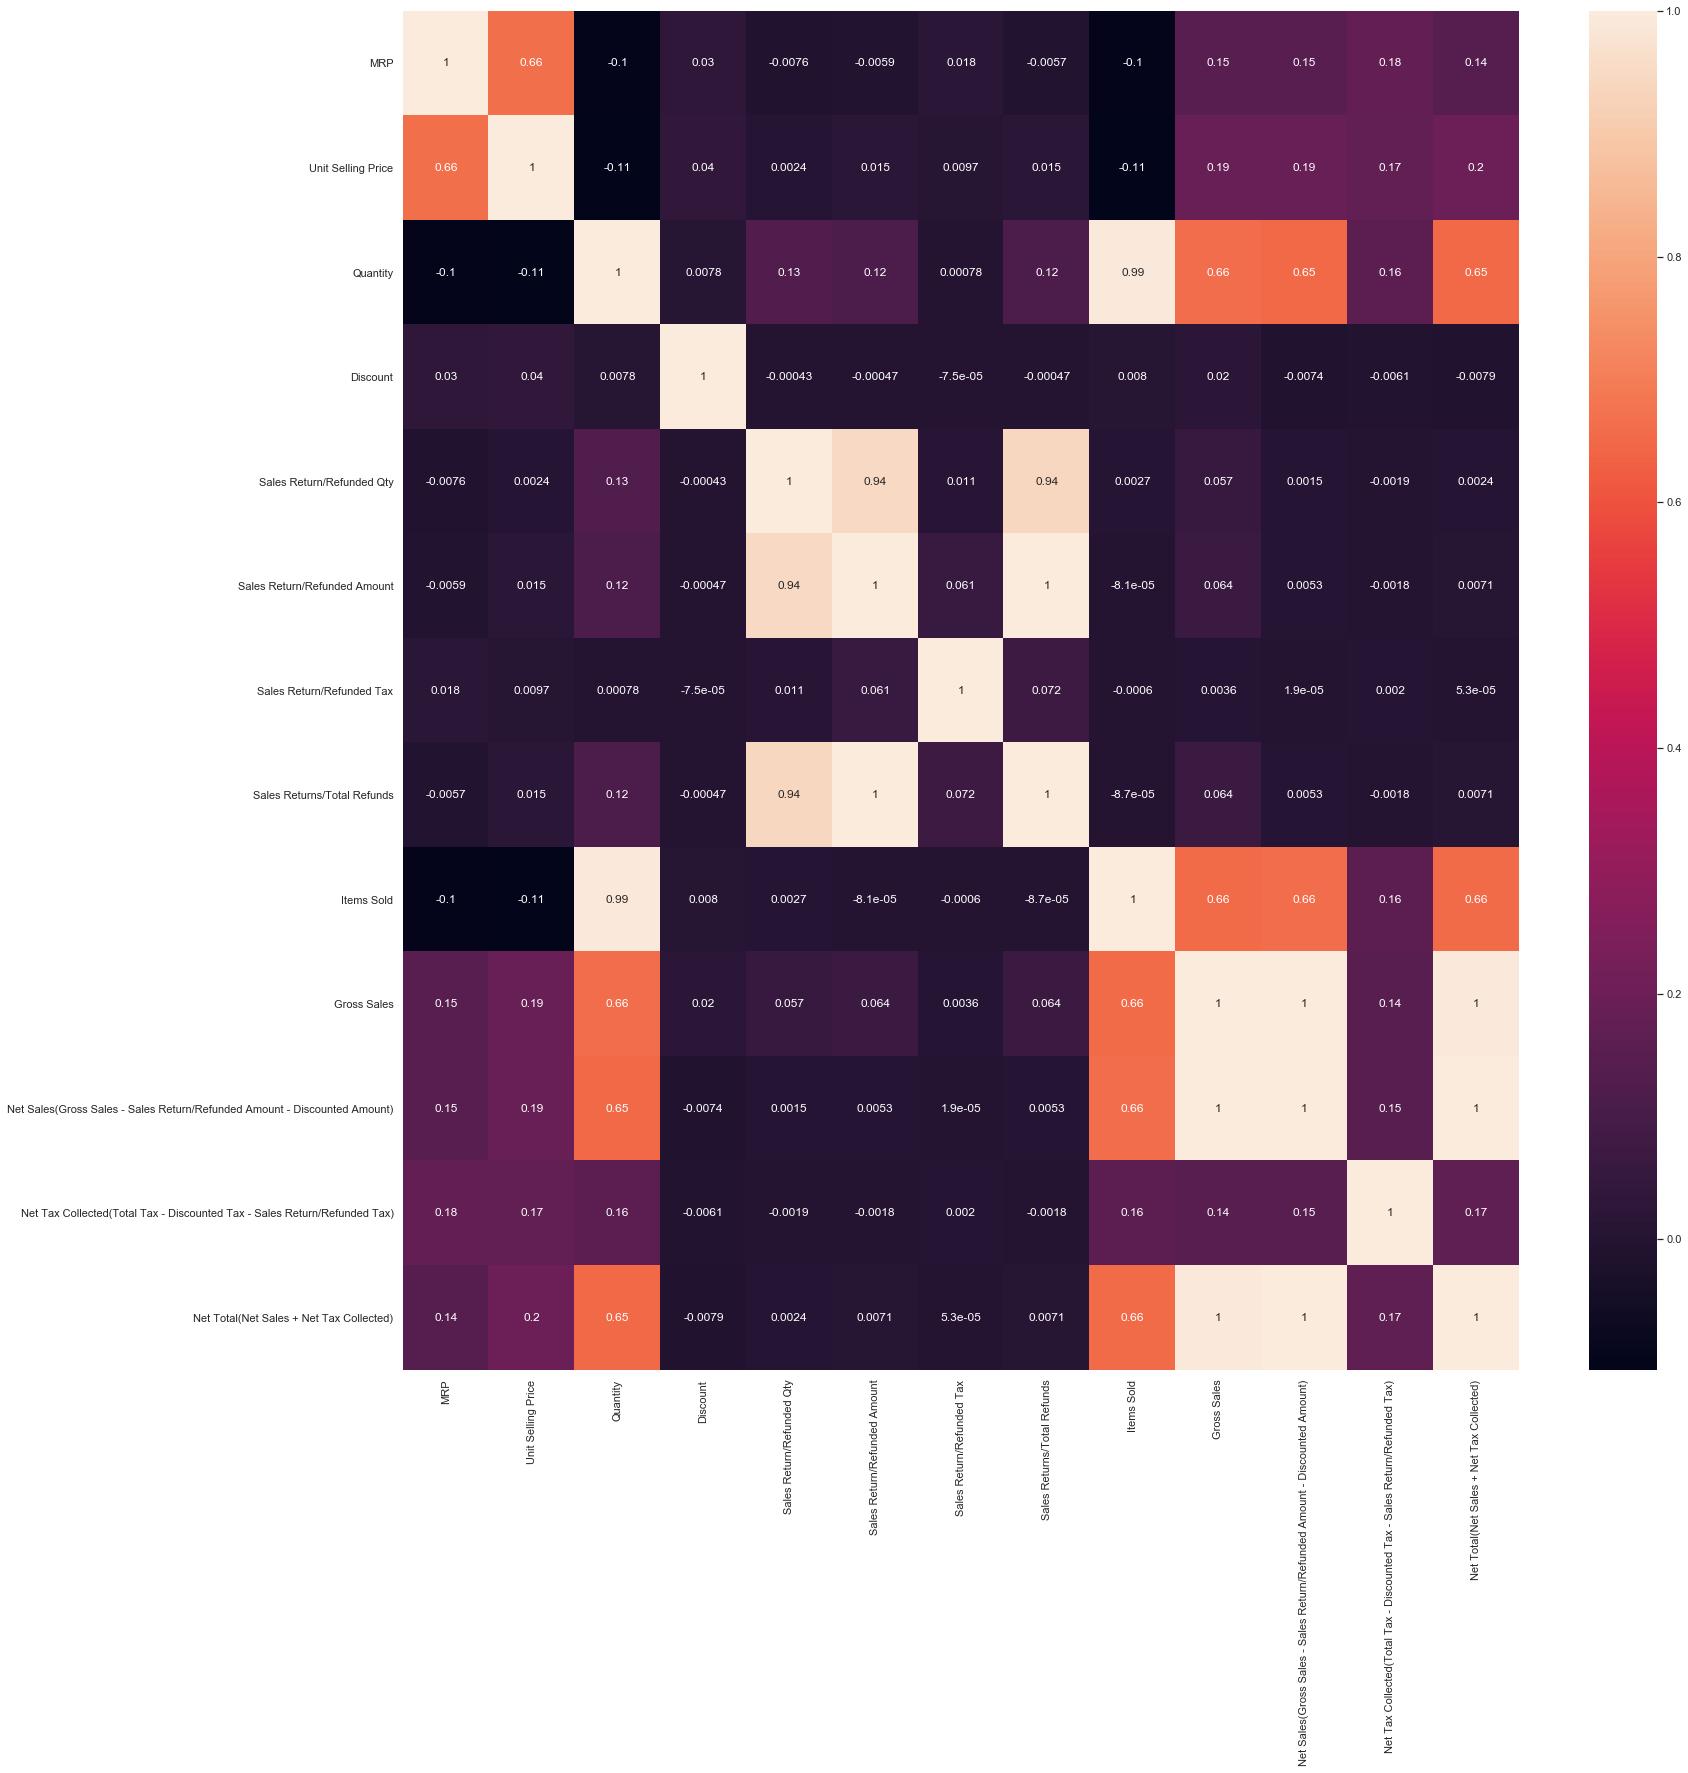

In [377]:
plt.subplots(figsize=(25,25))
sns.heatmap(imp_df.corr(),annot=True)

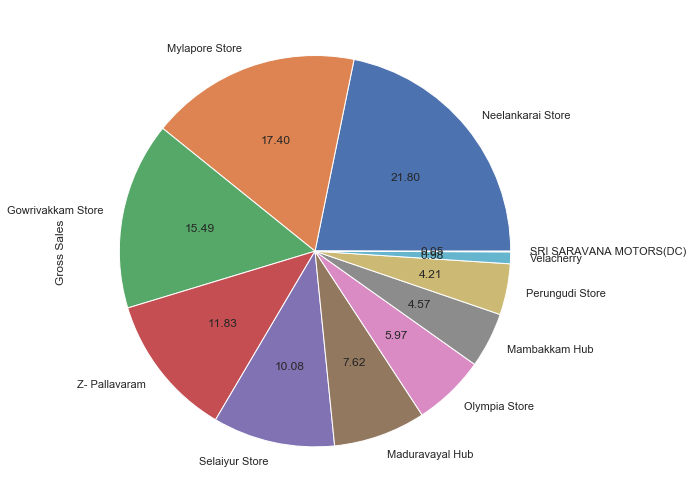

In [378]:
plt.subplots(figsize=(9,9))
dft.groupby("Location Name")["Gross Sales"].sum().sort_values(ascending=False).plot(kind="pie",autopct="%.2f")

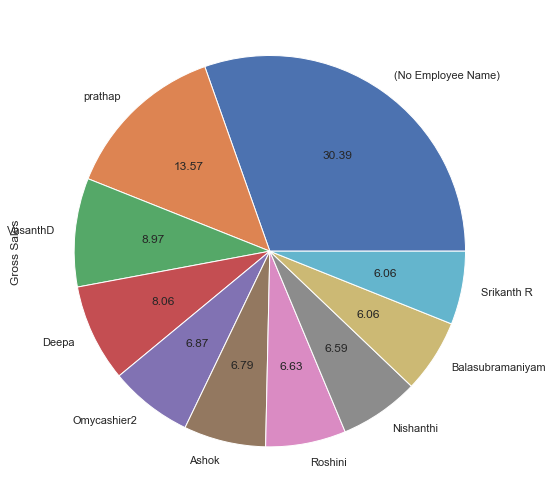

In [379]:
plt.subplots(figsize=(9,9))
dft.groupby("Employee Name")["Gross Sales"].sum().sort_values(ascending=False).head(10).plot(kind="pie",autopct="%.2f")

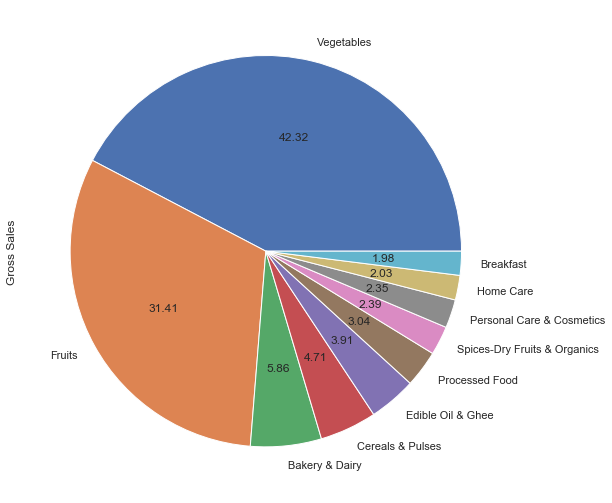

In [380]:
plt.subplots(figsize=(9,9))
dft.groupby("Category")["Gross Sales"].sum().sort_values(ascending=False).head(10).plot(kind="pie",autopct="%.2f")

In [381]:
dft["Created_month"]=dft["Created Date"].dt.month_name()

In [382]:
dft[dft.Category=="Vegetables"].groupby("Created_month")['Gross Sales'].sum()

Created_month
April       4650326.02
February    2712248.12
January     2942614.38
June        4554931.31
March       4127512.65
May         5178127.23
Name: Gross Sales, dtype: float64

In [383]:
dft["Created_week"] = dft["Created Date"].dt.week

In [453]:
# Removing 27th week because there is not enough data points
dft = dft[dft.Created_week!=27]

In [686]:
dft.groupby(by=['Created_week'],as_index=False)['Gross Sales'].count()

,Created_week,Gross Sales
0,1,38136
1,2,52173
2,3,38364
3,4,42033
4,5,42847
5,6,49555
6,7,45353
7,8,48877
8,9,43462
9,10,47855


In [454]:
dft_final = dft.groupby(by=['Created_week'],as_index=False)['Gross Sales'].sum()

In [455]:
dft_final = dft_final.sort_values(by=['Created_week'],ascending=True)

In [456]:
# dft_final["Created_week"] = dft_final["Created_week"].apply(lambda x: "week "+str(x))

In [457]:
dft_final = dft_final.set_index("Created_week")

Text(0.5, 1.0, 'Total Gross Sales')

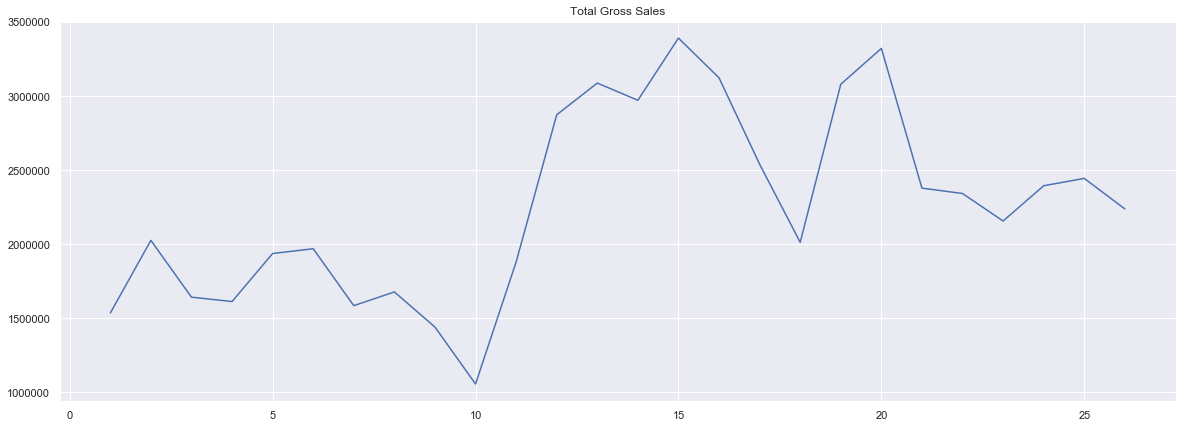

In [458]:
plt.subplots(figsize=(20,7))
plt.plot(dft_final["Gross Sales"])
plt.title("Total Gross Sales")

In [675]:
def rolling_statistics(dataframe):
    (plt.subplots(figsize=(20,7)))
    (plt.plot(dft_final.rolling(window=6).mean(),color='b',label='Mean'))
    (plt.plot(dft_final.rolling(window=6).std(),color='r',label='Standard deviation'))
    (plt.legend(loc='best'))
    (plt.xlabel("Week",color='k'))
    (plt.ylabel("Commercial TON",color='k'))
    plt.title("Rolling test statistics")

In [672]:
def adf(dataframe_column):
    df_test = adfuller(dataframe_column,autolag='AIC')
    print("P-value for ADF test- ",df_test[1])
    if df_test[1] > 0.05:
        print("The data is not stationery")
    else:
        print("The data is stationery")

In [673]:
def transformation(dataframe_column):
    return np.log(dataframe_column)

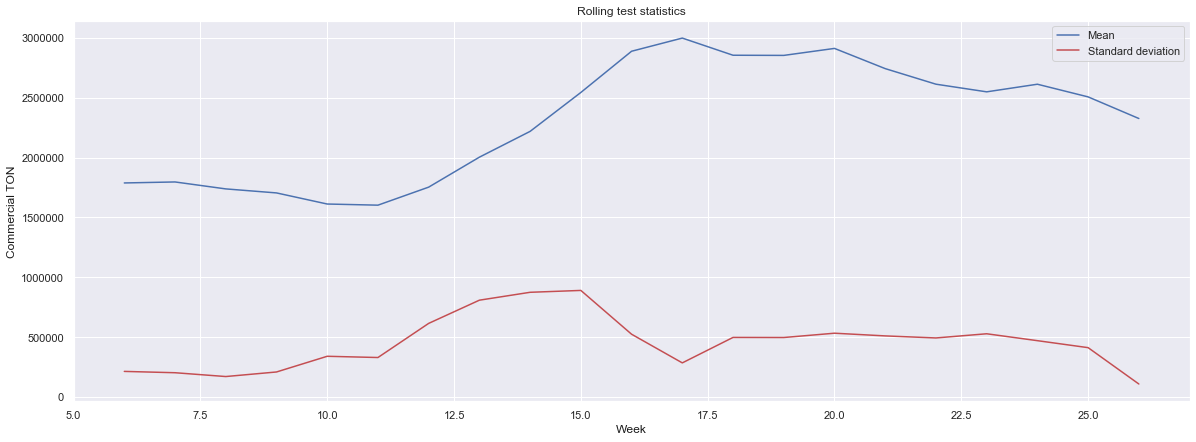

In [676]:
rolling_statistics(dft)

In [463]:
print("There is variance, data does not look stationery")

There is variance, data does not look stationery


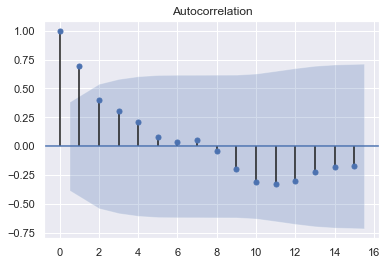

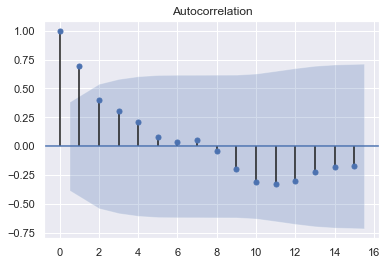

In [653]:
plot_acf(dft_final) # Checking auto-correlation

In [464]:
adf(dft_final['Gross Sales'])

P-value for ADF test-  0.22691082677472513
The data is not stationery


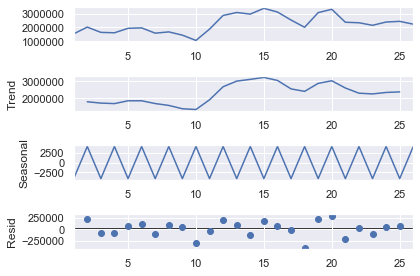

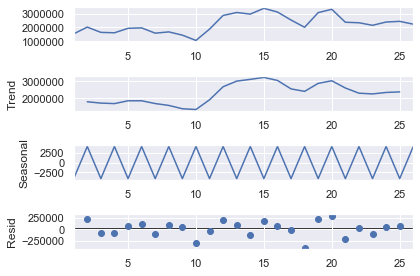

In [557]:
splot=seasonal_decompose(dft_final,model='additive',freq=2)
splot.plot()

In [ ]:
# Below steps to make data stationery

In [466]:
dft_logged = transformation(dft_final)

In [467]:
dft_diff = dft_logged.diff(axis = 0, periods = 1).dropna()
# Differencing will make first week data 'nan - not a number'

In [470]:
adf(dft_diff)

P-value for ADF test-  6.0934979930418944e-05
The data is stationery


In [475]:
dft_diff.shape

(25, 1)

In [ ]:
# below steps to split data into test and train

In [476]:
df_train = dft_diff[0:20]
df_test = dft_diff[20:]

In [ ]:
# below steps to find best parameters for model

In [477]:
p=i=q=range(0,5)
piq = itertools.product(p,i,q)
piq=list(piq)

In [478]:
for param in piq:
    try:
        model = ARIMA(df_train,order=param)
        results_AR = model.fit(disp=-1)
        print(param,results_AR.aic)
    except:
        continue
#checking the combination in which is error is less
#arima=it is a linera line with combination of auto regression and moving avg., it is one of the best model

(0, 0, 0) 5.339670833152731
(0, 0, 1) 7.312666708352879
(0, 0, 2) 2.539386614444666
(0, 0, 3) 4.223227729540504
(0, 0, 4) 5.994626528639387
(0, 1, 0) 17.618796045718444
(0, 1, 1) 11.118514284530441
(0, 1, 2) 12.378604494088677
(0, 1, 3) 11.525403013526713
(0, 1, 4) 12.817691866406754
(0, 2, 0) 32.338964901266664
(0, 2, 1) 22.805626803021383
(0, 2, 2) 19.852087095260302
(0, 2, 3) 20.438779609601333
(0, 2, 4) 21.15422893371909
(1, 0, 0) 7.338894390487759
(1, 0, 1) 7.763742147772277
(1, 0, 2) 4.309225290038391
(1, 0, 3) 4.692296867390965
(1, 1, 0) 18.7951589833445
(1, 1, 1) 13.018518710245104
(1, 1, 2) 13.333493587583511
(1, 1, 3) 13.002834749436218
(1, 2, 0) 31.90396547299993
(2, 0, 0) 5.008300142497582
(2, 0, 1) 6.479871558817173
(2, 0, 2) 6.214702332139694
(2, 0, 3) 6.394494633818695
(2, 0, 4) 8.239760382550926
(2, 1, 0) 12.481396665785034
(2, 1, 1) 11.611987098694684
(2, 1, 2) 12.951960196369761
(2, 1, 3) 13.764884983376184
(2, 1, 4) 14.992745458521696
(2, 2, 0) 25.344249534145533
(3,

In [ ]:
# below we are fitting the model

In [549]:
model = ARIMA(df_train,order=(4, 0, 1))
results_AR = model.fit()
print(param,results_AR.aic)

#using 1,1,0 bcz is has the less error

(4, 4, 4) 5.275447678012583


In [640]:
print("Printing predictions")
results_AR.predict(start=19,end=27)

Printing predictions


19   -0.180791
20    0.207931
21    0.282272
22   -0.112820
23    0.011319
24    0.184640
25   -0.021826
26   -0.059695
27    0.097043
dtype: float64

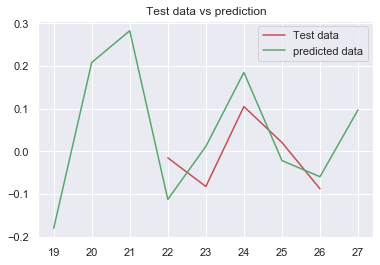

In [651]:
plt.plot(df_test,color="r")
plt.plot(results_AR.predict(start=19,end=27),color='g')
plt.title("Test data vs prediction")
plt.legend(["Test data", "predicted data"], loc ="top right")

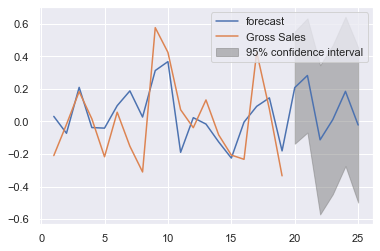

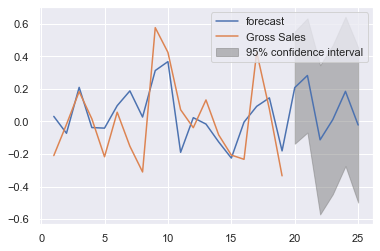

In [555]:
results_AR.plot_predict(1,25)

In [639]:
# Following code normalizes the test data (predicted data)

In [614]:
cols = dft_logged.columns
x = []
for col in cols:
    diff_results = dft_logged[col] + results_AR.predict(start=1,end=26).shift(-1)
    x.append(diff_results)
diff_df_inverted = pd.concat(x, axis=1)


In [624]:
predicted_dataframe = np.exp(diff_df_inverted[:-1]).astype(str)

In [627]:
predicted_dataframe = predicted_dataframe.rename(columns={0:"Gross Sales"})

In [635]:
predicted_dataframe['Gross Sales'] = predicted_dataframe['Gross Sales'].str.split(".",expand=True)[0]

In [638]:
predicted_dataframe[21:]

,Gross Sales
Created_week,
22,2369489
23,2594461
24,2343445
25,2303169
